# Modelo Auto-Arima

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX


from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import pmdarima as pm
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')
df

C:\Users\gabri\AppData\Local\Temp\ipykernel_12300\3450452656.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')


,Unnamed: 0,sexo,data_notificacao,idade,data_inicio_sintomas,sintomas,outros_sintomas,classificacao_final,resultado_final,bairro,...,SYMPTOM_BODY_PAIN,SYMPTOM_DIARRHEA,SYMPTOM_RUNNY_NOSE,SYMPTOM_NOSE_CONGESTION,SYMPTOM_WEAKNESS,SYMPTOM_ANOSMIA_OR_HYPOSMIA,SYMPTOM_NAUSEA,SYMPTOM_LACK_OF_APPETITE,SYMPTOM_ABDOMINAL_PAIN,SYMPTOM_CONSCIOUSNESS_DEGRADATION
0,0,1,2020-01-12,28,2020-01-12,['ASSINTOMÁTICO'],[],7,4,SANCHO,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2020-01-20,36,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2020-01-20,45,2020-01-20,['ASSINTOMÁTICO'],[],7,2,CASA AMARELA,...,0,0,0,0,0,0,0,0,0,0
3,3,1,2020-01-20,58,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2020-01-22,33,2020-01-22,['ASSINTOMÁTICO'],[],7,2,IPUTINGA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889840,889840,0,2022-01-23,27,2022-01-23,['OUTROS'],['PRÉ-CIRÚRGICO'],7,4,CAMPO GRANDE,...,0,0,0,0,0,0,0,0,0,0
889841,889841,1,2022-01-23,26,2022-01-23,['OUTROS'],['PRÉ-CIR´ÚRGICO'],7,4,IBURA,...,0,0,0,0,0,0,0,0,0,0
889842,889842,0,2022-01-23,38,2022-01-23,['ASSINTOMÁTICO'],['0'],7,4,COHAB,...,0,0,0,0,0,0,0,0,0,0
889843,889843,0,2022-01-23,26,2022-01-16,"['CORIZA', 'DOR DE CABEÇA', 'DOR DE GARGANTA',...",['0'],7,4,POCO,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st.sort_index(inplace = True)
df_st

,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


<AxesSubplot:xlabel='Data_notificacao'>

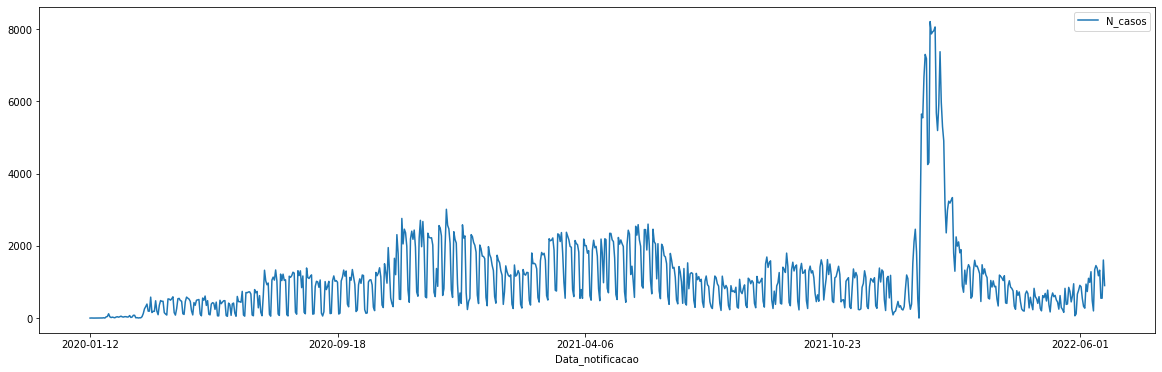

In [5]:
df_st.plot(figsize=(20,6))

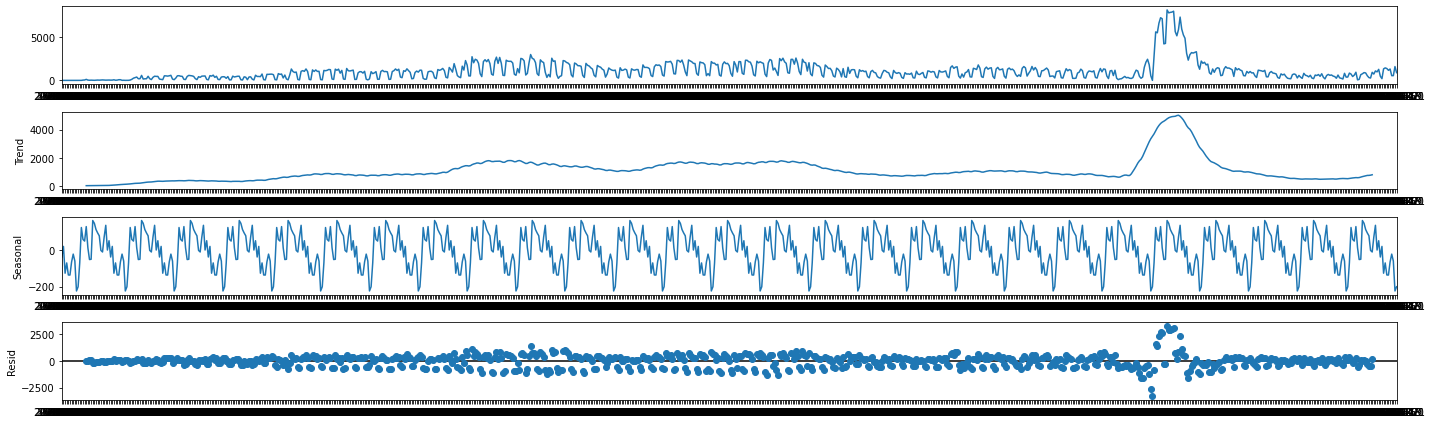

In [6]:
df_decomp = tsa.seasonal_decompose(df_st, period = 30)
df_decomp.plot();

Diferenciando a série para deixa-la estacionária

In [7]:
df_dif = df_st.diff(1)

<AxesSubplot:xlabel='Data_notificacao'>

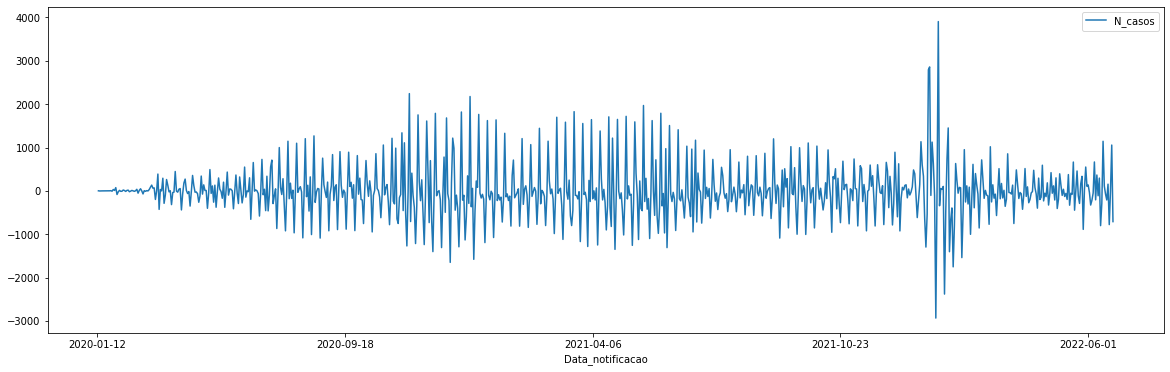

In [8]:
df_dif.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

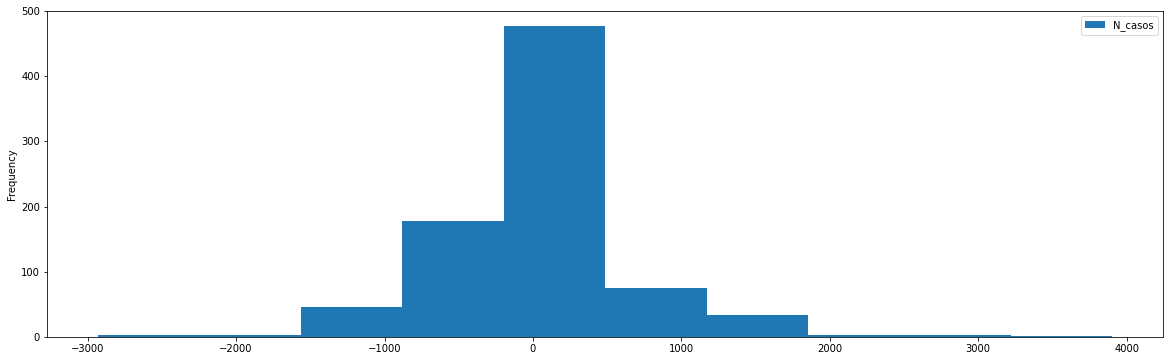

In [9]:
df_dif.plot.hist()

In [10]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(df_st, regression='ct')
print('ADF :', test)
print('P-Value: ',pvalue)
print('Num Of Lags: ',lags)
print('Num Of Observations Used For ADF Regression: ', ic)
print('Critical Values : ', critic )


ADF : -4.316131019349432
P-Value:  0.002969582869138721
Num Of Lags:  21
Num Of Observations Used For ADF Regression:  11755.976597434807
Critical Values :  {'1%': -3.970145331184678, '5%': -3.4159991116531545, '10%': -3.1302922371049116}


In [11]:
df_st

,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


Criando função para aplicação do modelo!

In [12]:
def apl_arima (df_st, m,  ):

    stepwise=auto_arima(df_st,
                    start_p=0,
                    start_q=0,
                    d=0,
                    max_p=6,
                    max_q=6,
                    max_d=2,
                    start_P=1,
                    start_Q=1,
                    D=1,
                    max_P=2, max_D=1, max_Q=2, max_order=5,
                    m=m,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True)

    #print('AIC: ',stepwise.aic())
    #print('BIC: ',stepwise.bic())

    treino = df_st.iloc[:int(len(df_st) * 0.7)]
    teste = df_st.iloc[int(len(df_st) * 0.7):]

    stepwise.fit(treino)
    
    #print(stepwise.summary())
    #stepwise.plot_diagnostics();

    previsao=stepwise.predict(247)
    previsao=pd.DataFrame(previsao)
    previsao['index'] = teste.index
    previsao = previsao.set_index('index')

    return stepwise , previsao
    

    

### APLICANDO AUTO-SARIMA

Periodicidade de 7 Dias

In [16]:
stepwise=auto_arima(df_st,
                    start_p=0,
                    start_q=0,
                    d=0,
                    max_p=6,
                    max_q=6,
                    max_d=2,
                    start_P=1,
                    start_Q=1,
                    D=1,
                    max_P=2, max_D=1, max_Q=2, max_order=5,
                    m=7,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=12851.922, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12891.075, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=12153.379, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=12537.439, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12889.244, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12239.849, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=12081.606, Time=1.10 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=11993.459, Time=1.96 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=11991.462, Time=1.37 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=12021.031, Time=0.68 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=11993.455, Time=2.43 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=11992.064, Time=1.35 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=11972.251, Time=1.22 sec
 ARIMA(2,0,0)(0,1,1)[7] i

In [17]:
print('AIC: ',stepwise.aic())
print('BIC: ',stepwise.bic())

AIC:  11943.334350241978
BIC:  11980.950033169998


Divindindo em treino (70%) e teste(30%)

In [20]:
treino = df_st.iloc[:int(len(df_st) * 0.7)]
teste = df_st.iloc[int(len(df_st) * 0.7):]

In [21]:
stepwise.fit(treino)

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(0, 1, 2, 7),
      suppress_warnings=True, with_intercept=False)

In [51]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  574
Model:             SARIMAX(4, 0, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -4006.822
Date:                                Fri, 04 Nov 2022   AIC                           8029.644
Time:                                        15:45:02   BIC                           8064.367
Sample:                                             0   HQIC                          8043.195
                                                - 574                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2156      0.061     20.057      0.000       1.097       1.334
ar.L2         -0.2318      0.061     -3.808      0.000      -0.351      -0.112
ar.L3         -0.1682      0.054     -3.095      0.002      -0.275      -0.062
ar.L4          0.1620      0.047      3.447      0.001       0.070       0.254
ma.L1         -0.8268      0.049    -16.716      0.000      -0.924      -0.730
ma.S.L7       -0.7284      0.030    -24.148      0.000      -0.787      -0.669
ma.S.L14      -0.0189      0.035     -0.545      0.586      -0.087       0.049
sigma2      8.024e+04   2701.983     29.695      0.000    7.49e+04    8.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1029.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

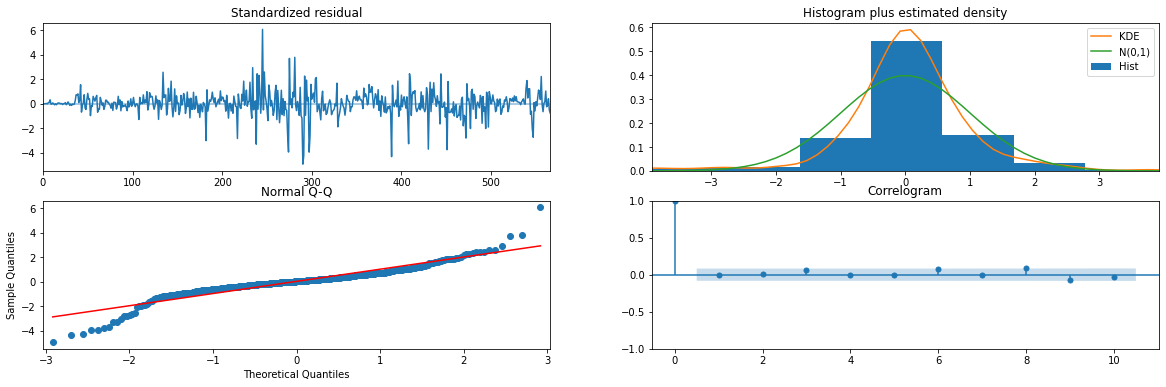

In [52]:
stepwise.plot_diagnostics();

In [92]:
previsao=stepwise.predict(247)
previsao=pd.DataFrame(previsao)
previsao['index'] = teste.index
previsao = previsao.set_index('index')
previsao

,0
index,
2021-09-27,1273.856454
2021-09-28,1307.943697
2021-09-29,1283.583636
2021-09-30,1426.535985
2021-10-01,1406.641924
...,...
2022-06-17,1459.274088
2022-06-18,595.889333
2022-06-19,449.415371


<Figure size 1440x360 with 0 Axes>

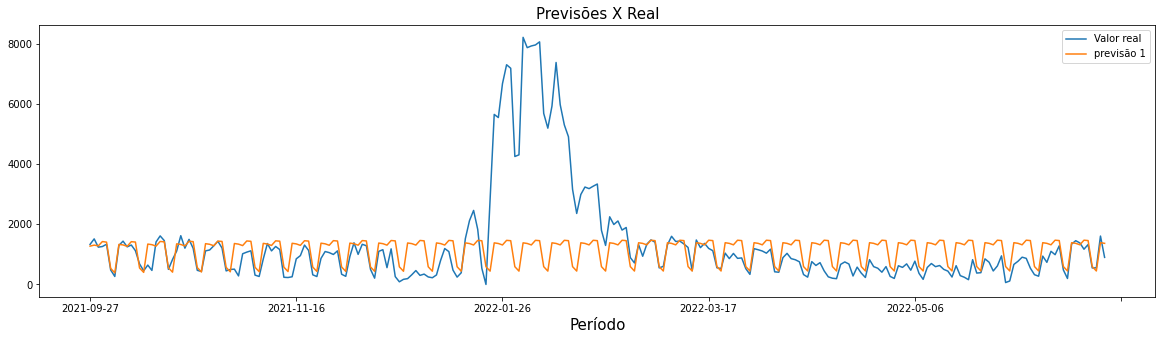

In [93]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1']);

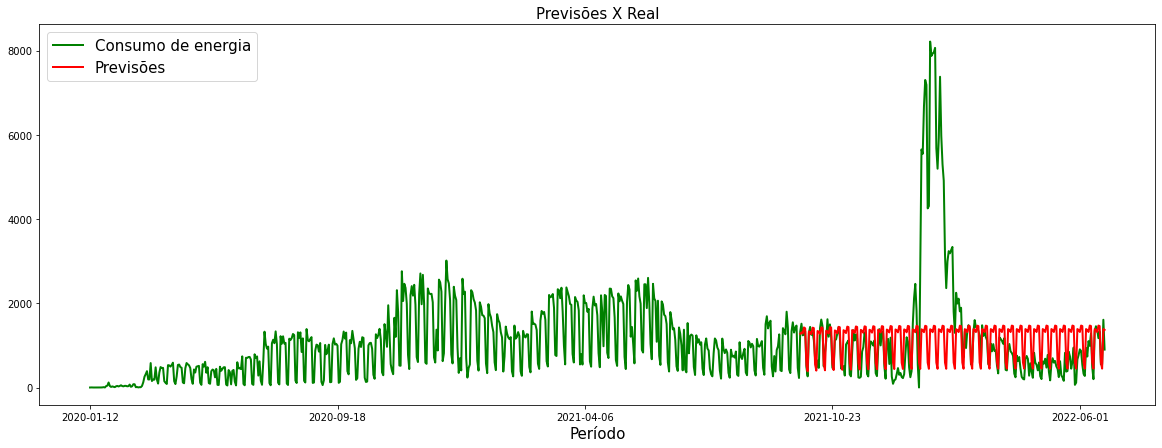

In [94]:
pd.concat([df_st,previsao],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Consumo de energia','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();

## Aplicando o modelo para periodicidade de 1 dia

In [104]:
stepwise2 , previsao2 = apl_arima(df_st, 1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13819.367, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12800.443, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13181.204, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14381.101, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12800.383, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12735.269, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=12731.592, Time=0.13 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=12715.893, Time=0.18 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=12511.985, Time=0.26 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=12497.820, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=12648.884, Time=0.88 sec
 ARIMA(6,0,2)(0,0,0)[0] intercept   : AIC=12310.291, Time=1.16 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(6,0,3)(0,0,0)[0] intercept   : AIC=12320.518, Time=1.22 sec
 ARIMA(5,0,3)(0,0,0)[0] i

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [105]:
stepwise2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  574
Model:               SARIMAX(6, 0, 2)   Log Likelihood               -4175.344
Date:                Fri, 04 Nov 2022   AIC                           8370.688
Time:                        16:13:42   BIC                           8414.214
Sample:                             0   HQIC                          8387.666
                                - 574                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     93.6570     33.782      2.772      0.006      27.446     159.868
ar.L1          1.0700      0.041     26.234      0.000       0.990       1.150
ar.L2         -0.8071      0.060    -13.431      0.000      -0.925      -0.689
ar.L3          0.2701      0.065      4.146      0.000       0.142       0.398
ar.L4          0.0842      0.062      1.365      0.172      -0.037       0.205
ar.L5         -0.3174      0.056     -5.667      0.000      -0.427      -0.208
ar.L6          0.6044      0.039     15.437      0.000       0.528       0.681
ma.L1         -0.8267      0.033    -25.428      0.000      -0.890      -0.763
ma.L2          0.6111      0.035     17.286      0.000       0.542       0.680
sigma2      1.335e+05   6361.909     20.991      0.000    1.21e+05    1.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               206.34
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.33   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

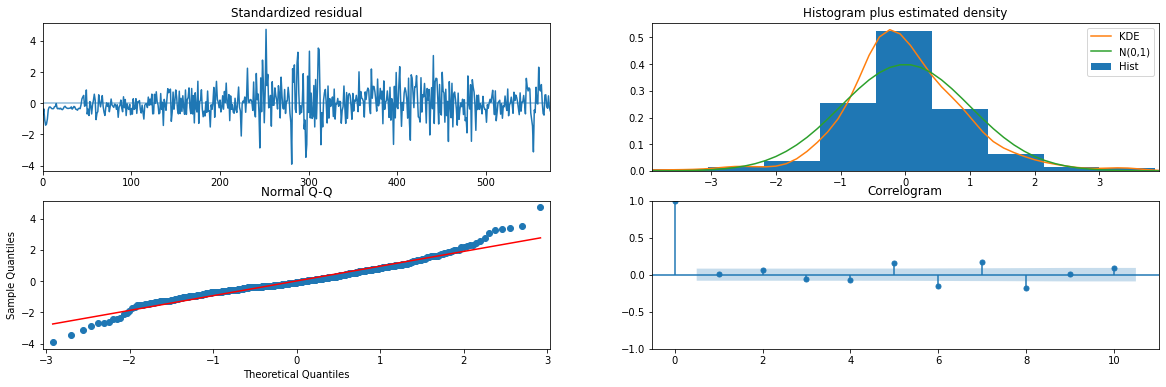

In [106]:
stepwise2.plot_diagnostics();

<Figure size 1440x360 with 0 Axes>

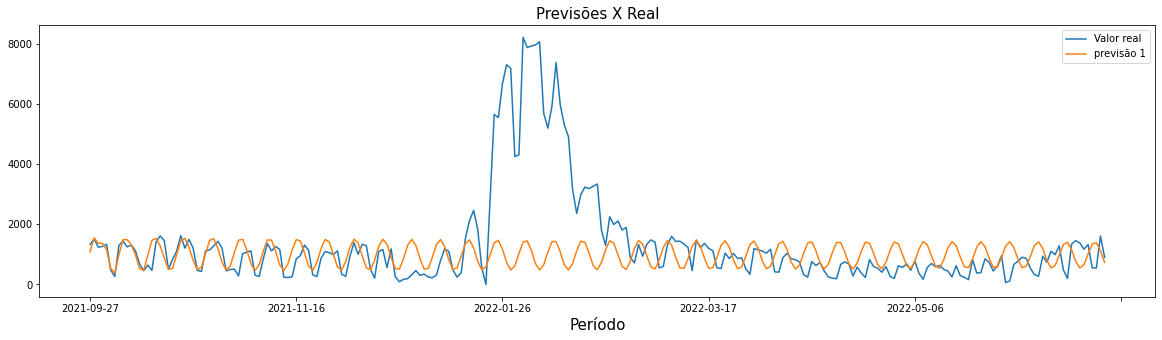

In [107]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1']);

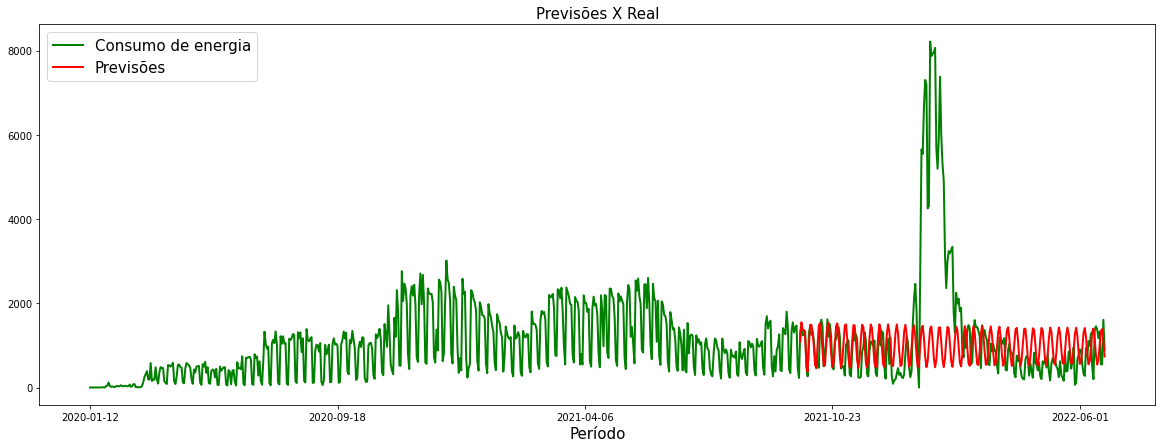

In [108]:
pd.concat([df_st,previsao2],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Consumo de energia','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();

In [13]:
stepwise2 , previsao2 = apl_arima(df_st, 15)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[15] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(0,1,0)[15] intercept   : AIC=13669.575, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[15] intercept   : AIC=12964.364, Time=1.61 sec
 ARIMA(0,0,1)(0,1,1)[15] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,0)(0,1,0)[15]             : AIC=13667.819, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[15] intercept   : AIC=13036.362, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[15] intercept   : AIC=12811.731, Time=4.98 sec
 ARIMA(1,0,0)(2,1,1)[15] intercept   : AIC=inf, Time=9.26 sec
 ARIMA(1,0,0)(1,1,1)[15] intercept   : AIC=inf, Time=4.07 sec
 ARIMA(0,0,0)(2,1,0)[15] intercept   : AIC=13559.853, Time=8.84 sec
 ARIMA(2,0,0)(2,1,0)[15] intercept   : AIC=12813.370, Time=6.14 sec
 ARIMA(1,0,1)(2,1,0)[15] intercept   : AIC=12813.206, Time=5.42 sec
 ARIMA(0,0,1)(2,1,0)[15] intercept   : AIC=13090.630, Time=4.31 sec
 ARIMA(2,0,1)(2,1,0)[15] intercept   : AIC=12810.635, Time=10.06 sec
 ARIMA(2,0,1)(1,1,0)[15] int

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1']);

NameError: name 'teste' is not defined

<Figure size 1440x360 with 0 Axes>